In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("DG-AssocMiner_miner-disease-gene.csv",sep=";")

In [18]:
df.head()

,Disease_ID,Disease_Name,Gene_ID
0,C0036095,Salivary Gland Neoplasms,1462
1,C0036095,Salivary Gland Neoplasms,1612
2,C0036095,Salivary Gland Neoplasms,182
3,C0036095,Salivary Gland Neoplasms,2011
4,C0036095,Salivary Gland Neoplasms,2019


# General Information

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21357 entries, 0 to 21356
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease_ID    21357 non-null  object
 1   Disease_Name  21357 non-null  object
 2   Gene_ID       21357 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 500.7+ KB


In [20]:
df.shape #21357

(21357, 3)

In [21]:
df["Disease_Name"].nunique()

519

In [22]:
df["Gene_ID"].nunique()

7294

In [23]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Disease_ID,Disease_Name,Gene_ID


# Explorative analyses

# Most common Diseases

In [24]:
top_df_diseases=df['Disease_Name'].value_counts()[:10]
top_df_diseases 

Prostatic Neoplasms       485
IGA Glomerulonephritis    450
Mammary Neoplasms         433
Obesity                   298
Peripheral Neuropathy     293
Stomach Neoplasms         284
Schizophrenia             280
Autistic Disorder         254
Colorectal Neoplasms      232
Liver carcinoma           222
Name: Disease_Name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Disease_Name'>

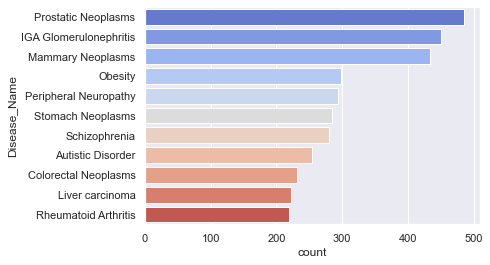

In [25]:
sns.countplot(y="Disease_Name", data=df, palette="coolwarm",
              order=df.Disease_Name.value_counts().iloc[:11].index)

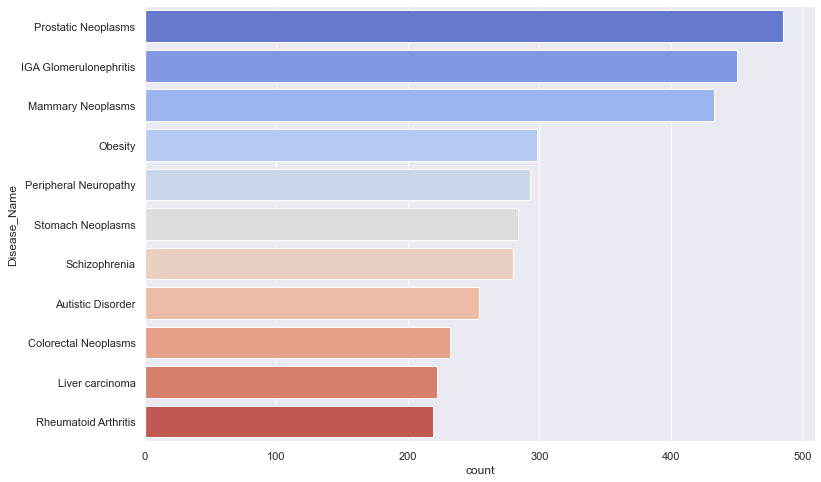

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
swarm_plot = sns.countplot(y="Disease_Name", data=df, palette="coolwarm",
              order=df.Disease_Name.value_counts().iloc[:11].index)
fig = swarm_plot.get_figure()
fig.savefig("top_disease.png") 

#  Most common Diseases_ID

In [167]:
top_df_diseases_id=df['Disease_ID'].value_counts()[:10]
top_df_diseases_id 

C0033578    485
C0017661    450
C1458155    433
C0028754    298
C0031117    293
C0038356    284
C0036341    280
C0004352    254
C0009404    232
C2239176    222
Name: Disease_ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Disease_ID'>

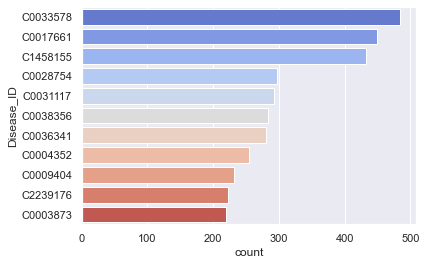

In [168]:

sns.countplot(y="Disease_ID", data=df, palette="coolwarm",
              order=df.Disease_ID.value_counts().iloc[:11].index)

# Least common Diseases

In [169]:
low_df_diseases=df['Disease_Name'].value_counts().tail(41)
low_df_diseases

Atrophic                                               10
Nephritis, Interstitial                                10
Osteitis Deformans                                     10
Tongue Neoplasms                                       10
beta Thalassemia                                       10
Renal dysplasia and retinal aplasia (disorder)         10
Marfan Syndrome                                        10
Myoclonic Epilepsy, Juvenile                           10
Methylmalonic acidemia                                 10
Birth Weight                                           10
Jeune thoracic dystrophy                               10
Arrhythmogenic Right Ventricular Dysplasia             10
Erectile dysfunction                                   10
Hepatomegaly                                           10
Diarrhea                                               10
Absence Epilepsy                                       10
Tonic-Clonic Epilepsy                                  10
Marijuana Abus

<AxesSubplot:xlabel='count', ylabel='Disease_Name'>

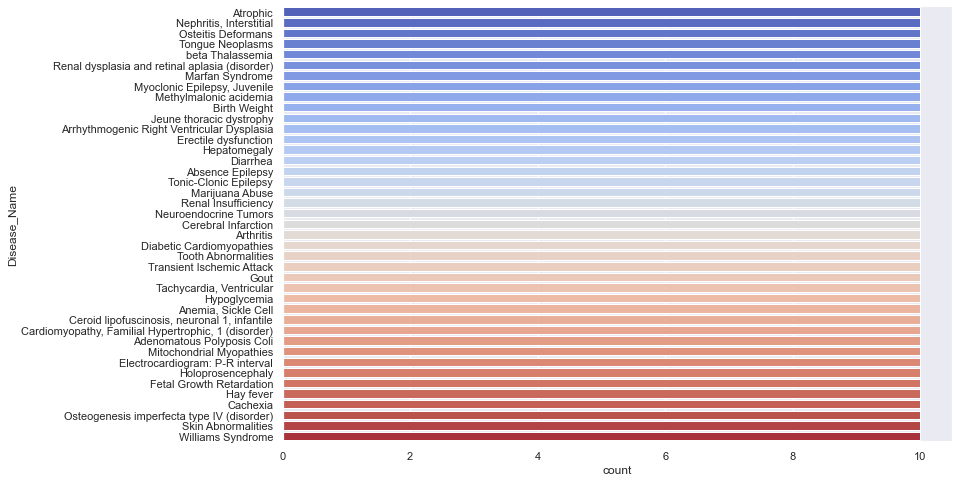

In [170]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(y="Disease_Name", data=df, palette="coolwarm",
              order=df.Disease_Name.value_counts().iloc[-41:].index)


# Least commen disease ID

In [171]:
low_df_diseases_id=df['Disease_ID'].value_counts().tail(41)
low_df_diseases_id

C0333641    10
C0027707    10
C0029401    10
C0040411    10
C0005283    10
C0403553    10
C0024796    10
C0270853    10
C0268583    10
C0005612    10
C0265275    10
C0349788    10
C0242350    10
C0019209    10
C0011991    10
C0014553    10
C0014549    10
C0024809    10
C1565489    10
C0206754    10
C0007785    10
C0003864    10
C0853897    10
C0040427    10
C0007787    10
C0018099    10
C0042514    10
C0020615    10
C0002895    10
C2931673    10
C3495498    10
C0032580    10
C0162670    10
C0429087    10
C0079541    10
C0015934    10
C0018621    10
C0006625    10
C0268363    10
C0037268    10
C0175702    10
Name: Disease_ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Disease_ID'>

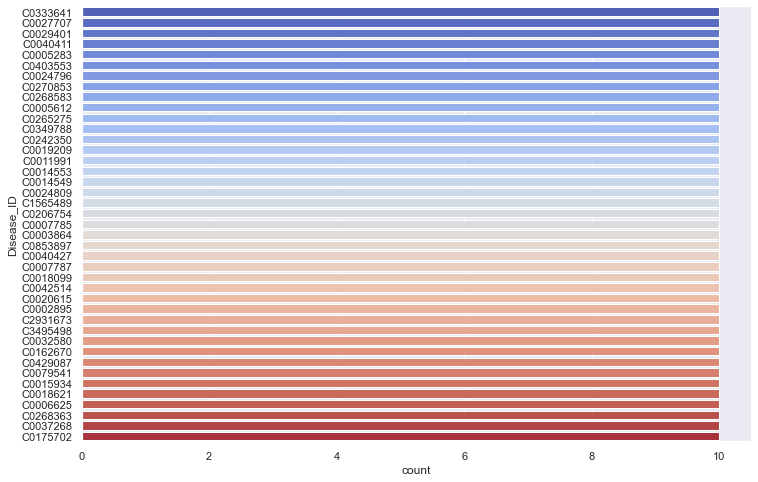

In [172]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(y="Disease_ID", data=df, palette="coolwarm",
              order=df.Disease_ID.value_counts().iloc[-41:].index)

# Most common Genes

In [173]:
top_df_Gene=df['Gene_ID'].value_counts()[:10]
top_df_Gene 

7124    115
6648     96
5743     83
3569     79
7157     68
3553     61
7040     58
4524     56
7422     50
5443     49
Name: Gene_ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gene_ID'>

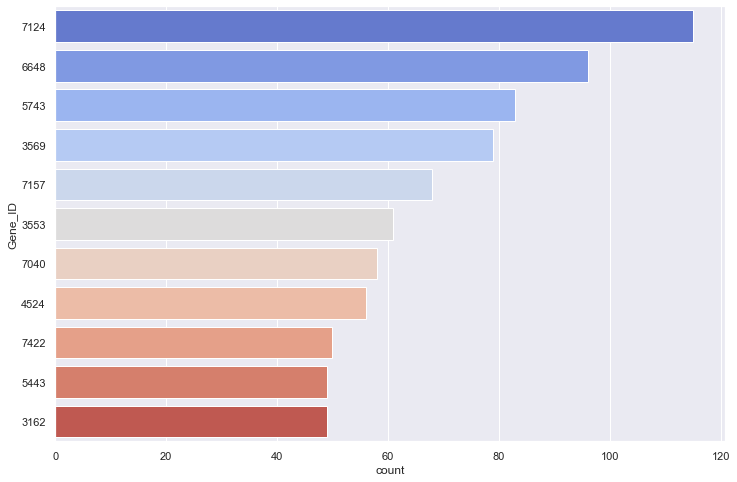

In [174]:
sns.countplot(y="Gene_ID", data=df, palette="coolwarm",
              order=df.Gene_ID.value_counts().iloc[:11].index)

In [175]:
low_df_Gene=df["Gene_ID"].value_counts()
low_df_Gene

7124      115
6648       96
5743       83
3569       79
7157       68
         ... 
169270      1
201299      1
23005       1
23170       1
947         1
Name: Gene_ID, Length: 7294, dtype: int64

In [176]:
low_df_Gene[low_df_Gene==1]

100188836    1
388165       1
338334       1
4522         1
84987        1
            ..
169270       1
201299       1
23005        1
23170        1
947          1
Name: Gene_ID, Length: 3612, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gene_ID'>

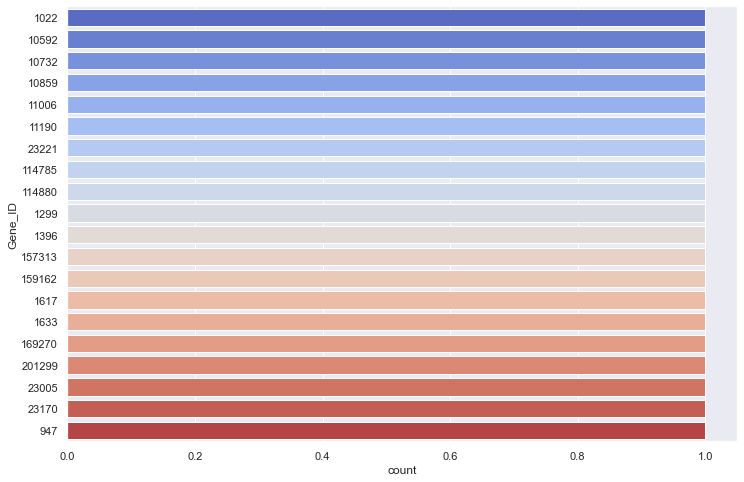

In [177]:
sns.countplot(y="Gene_ID", data=df, palette="coolwarm",
              order=df.Gene_ID.value_counts().iloc[-20:].index)

In [178]:
df.drop('Disease_Name', inplace=True, axis=1)

# Group and count by diseasename

In [179]:
df_disease=df[["Disease_ID"]] 

In [180]:
test=df_disease.value_counts().reset_index()

In [181]:
test.shape

(519, 2)

In [182]:
test.head()

,Disease_ID,0
0,C0033578,485
1,C0017661,450
2,C1458155,433
3,C0028754,298
4,C0031117,293


[Text(0.5, 0, 'how often a Disease occur'), Text(0, 0.5, 'Count')]

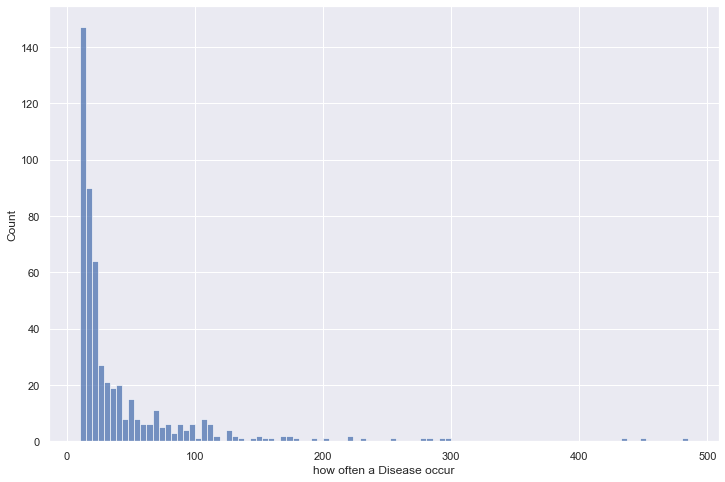

In [183]:
gfg=sns.histplot(data=test, x=0,bins=100)
gfg.set(xlabel ="how often a Disease occur", ylabel = "Count")

In [184]:
df.groupby('Disease_ID').count()

,Gene_ID
Disease_ID,
C0000768,11
C0000786,108
C0001418,108
C0001430,32
C0001624,11
...,...
C3495498,10
C3495559,128
C3714756,129


# How many Genes occur how often

In [185]:
df_Gene=df[["Gene_ID"]] 
test_Gene=df_Gene.value_counts().reset_index()


In [186]:
test_Gene.tail(50)

,Gene_ID,0
7244,26276,1
7245,3749,1
7246,26278,1
7247,26281,1
7248,3746,1
7249,26289,1
7250,26298,1
7251,3797,1
7252,26330,1
7253,26353,1


In [187]:
print(df.groupby('Gene_ID').count())

           Disease_ID
Gene_ID              
2                   8
9                   5
10                 10
12                  2
16                  1
...               ...
102724748           2
102724766           3
102724814           1
102725019           1
102800310           2

[7294 rows x 1 columns]


[Text(0.5, 0, 'how often a Gene occur'), Text(0, 0.5, 'Count')]

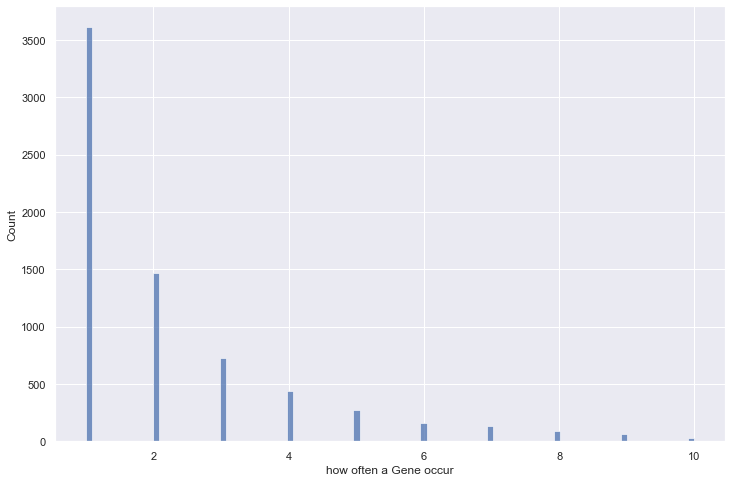

In [188]:
gfg=sns.histplot(data=test_Gene[-7000:], x=0,bins=100)
gfg.set(xlabel ="how often a Gene occur", ylabel = "Count") 
# bsp. es gibt über3500  Gene die einmal vor kommen
#welche Diseases  haben die gene die nur einmal vorkommen
#-> gibt es ein dises das NUR dieses n dieser einzelnen 

<AxesSubplot:xlabel='0', ylabel='count'>

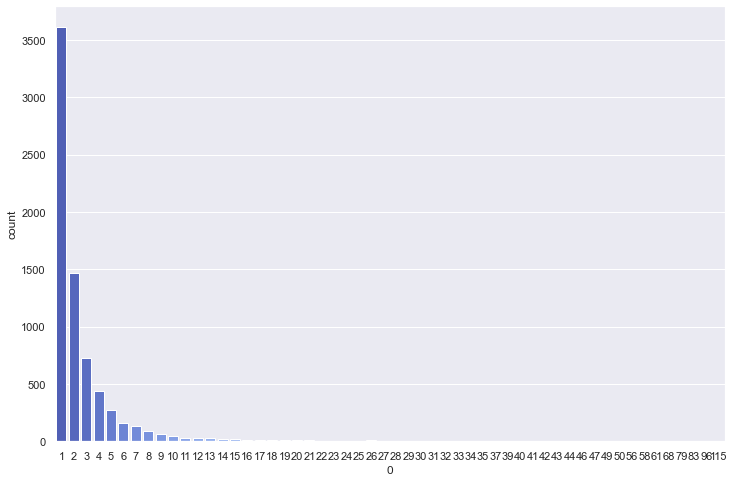

In [189]:
sns.countplot(x=0, data=test_Gene, palette="coolwarm")


# Datset with the most two common  cancertypes

In [190]:
df.head()

,Disease_ID,Gene_ID
0,C0036095,1462
1,C0036095,1612
2,C0036095,182
3,C0036095,2011
4,C0036095,2019


In [191]:
df['Disease_ID'].value_counts()[:10]

C0033578    485
C0017661    450
C1458155    433
C0028754    298
C0031117    293
C0038356    284
C0036341    280
C0004352    254
C0009404    232
C2239176    222
Name: Disease_ID, dtype: int64

# Remove C on Disease_ID

In [137]:
#df['Disease_ID']=df['Disease_ID'].str[1:]

In [192]:
df.head()

,Disease_ID,Gene_ID
0,C0036095,1462
1,C0036095,1612
2,C0036095,182
3,C0036095,2011
4,C0036095,2019


In [193]:
top_2_Disease=df[df['Disease_ID'].isin(['C0033578','C0017661'])]

In [194]:
top_2_Disease

,Disease_ID,Gene_ID
4114,C0033578,10
4115,C0033578,10013
4116,C0033578,100188789
4117,C0033578,10040
4118,C0033578,1012
...,...,...
19446,C0017661,9889
19447,C0017661,991
19448,C0017661,9926
19449,C0017661,9928


In [195]:
top_2_Disease.shape

(935, 2)

# All Genes that occur  in the top 2 Disease

<AxesSubplot:xlabel='count', ylabel='Gene_ID'>

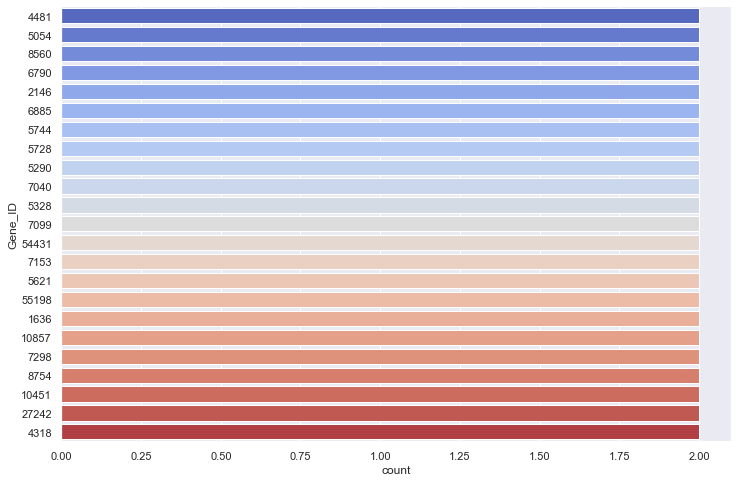

In [196]:
sns.countplot(y="Gene_ID", data=top_2_Disease, palette="coolwarm",
              order=top_2_Disease.Gene_ID.value_counts().iloc[:23].index)

In [197]:
top_2_Disease.to_csv("top_2_Diseases_ID.csv",index=False)

In [198]:
ok=pd.read_csv("top_2_Diseases_ID.csv")

In [199]:
ok.head()

,Disease_ID,Gene_ID
0,C0033578,10
1,C0033578,10013
2,C0033578,100188789
3,C0033578,10040
4,C0033578,1012


# Dataset with the least common cancertypes

In [200]:
low_2_df_diseases=df['Disease_ID'].value_counts().tail(41)


In [201]:
low_2_df_diseases

C0333641    10
C0027707    10
C0029401    10
C0040411    10
C0005283    10
C0403553    10
C0024796    10
C0270853    10
C0268583    10
C0005612    10
C0265275    10
C0349788    10
C0242350    10
C0019209    10
C0011991    10
C0014553    10
C0014549    10
C0024809    10
C1565489    10
C0206754    10
C0007785    10
C0003864    10
C0853897    10
C0040427    10
C0007787    10
C0018099    10
C0042514    10
C0020615    10
C0002895    10
C2931673    10
C3495498    10
C0032580    10
C0162670    10
C0429087    10
C0079541    10
C0015934    10
C0018621    10
C0006625    10
C0268363    10
C0037268    10
C0175702    10
Name: Disease_ID, dtype: int64

In [202]:
low_41_Disease=df[df['Disease_ID'].isin(["C0333641","C0027707","C0029401","C0040411","C0005283","C0403553","C0024796","C0270853","C0268583","C0005612","C0265275","C0349788","C0242350","C0019209","C0011991","C0014553","C0014549","C0024809","C1565489","C0206754","C0007785","C0003864","C0853897","C0040427","C0007787","C0018099","C0042514","C0020615","C0002895","C2931673","C3495498","C0032580","C0162670","C0429087","C0079541","C0015934","C0018621","C0006625","C0268363","C0037268","C0175702"])]


In [203]:
low_41_Disease

,Disease_ID,Gene_ID
643,C0206754,1027
644,C0206754,1616
645,C0206754,4221
646,C0206754,546
647,C0206754,5744
...,...,...
20247,C0037268,6648
20248,C0037268,6832
20249,C0037268,84627
20250,C0037268,8626


# Most common Genes that appear in all low Diseases

<AxesSubplot:xlabel='count', ylabel='Gene_ID'>

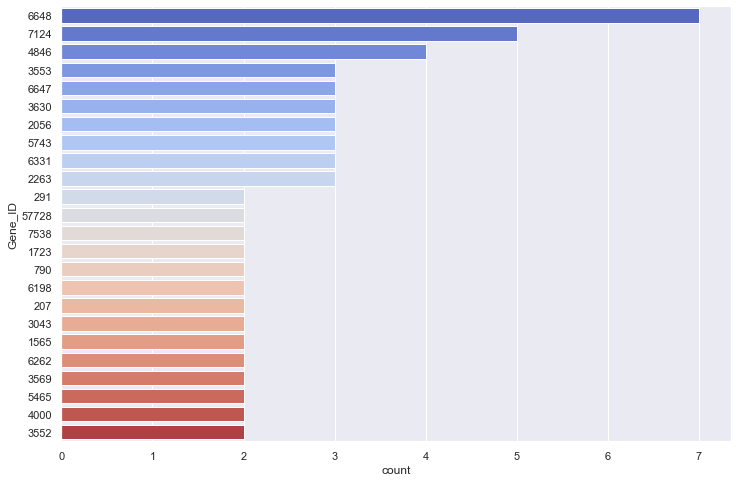

In [204]:
sns.countplot(y="Gene_ID", data=low_41_Disease, palette="coolwarm",
              order=low_41_Disease.Gene_ID.value_counts().iloc[:24].index)

In [205]:
low_41_Disease.to_csv("low_41_Disease_ID.csv",index=False)

In [206]:
ok_2=pd.read_csv("low_41_Disease_ID.csv")

In [207]:
ok_2.head(-60)

,Disease_ID,Gene_ID
0,C0206754,1027
1,C0206754,1616
2,C0206754,4221
3,C0206754,546
4,C0206754,5744
...,...,...
345,C0003864,3240
346,C0003864,51300
347,C0003864,7538
348,C0003864,79679


# Correlation between low and high Diseases

In [208]:
#Merge data
ok_final=pd.concat([ok,ok_2], axis=0)
#heatmap
#korrelation

In [209]:
ok_final

,Disease_ID,Gene_ID
0,C0033578,10
1,C0033578,10013
2,C0033578,100188789
3,C0033578,10040
4,C0033578,1012
...,...,...
405,C0037268,6648
406,C0037268,6832
407,C0037268,84627
408,C0037268,8626


In [210]:
ok_final

,Disease_ID,Gene_ID
0,C0033578,10
1,C0033578,10013
2,C0033578,100188789
3,C0033578,10040
4,C0033578,1012
...,...,...
405,C0037268,6648
406,C0037268,6832
407,C0037268,84627
408,C0037268,8626


In [211]:
ok_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease_ID  1345 non-null   object
 1   Gene_ID     1345 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.5+ KB


# Dataset with the 2  most common Genes

In [212]:
df['Gene_ID'].value_counts()[:10]

7124    115
6648     96
5743     83
3569     79
7157     68
3553     61
7040     58
4524     56
7422     50
5443     49
Name: Gene_ID, dtype: int64

In [213]:
top_2_Genes=df[df['Gene_ID'].isin([7124,6648])]

In [214]:
top_2_Genes

,Disease_ID,Gene_ID
58,C0033941,6648
132,C0033860,6648
136,C0033860,7124
172,C0027726,6648
520,C0003873,6648
...,...,...
21099,C0014859,6648
21168,C0752347,6648
21234,C0311375,6648
21238,C0311375,7124


In [216]:
top_2_Genes.to_csv("top_2_Genes_ID.csv",index=False)

In [217]:
ok_genes=pd.read_csv("top_2_Genes_ID.csv")

In [218]:
ok_genes

,Disease_ID,Gene_ID
0,C0033941,6648
1,C0033860,6648
2,C0033860,7124
3,C0027726,6648
4,C0003873,6648
...,...,...
206,C0014859,6648
207,C0752347,6648
208,C0311375,6648
209,C0311375,7124


# All Disease that appear in the top 2 Genes

<AxesSubplot:xlabel='count', ylabel='Disease_ID'>

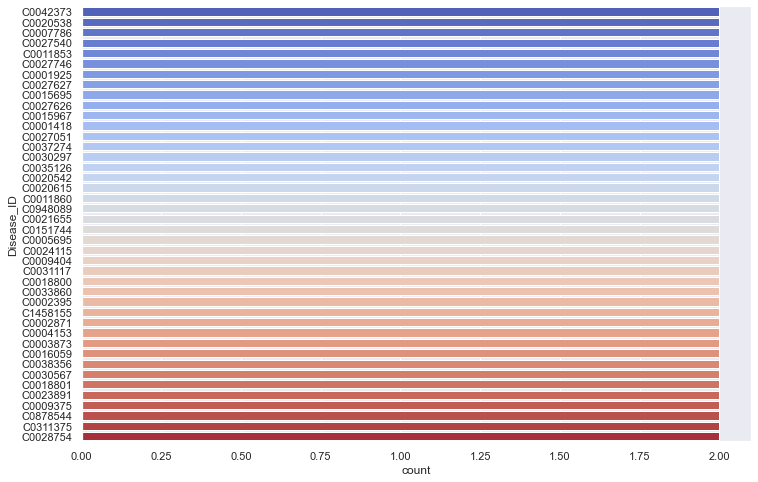

In [220]:
sns.countplot(y="Disease_ID", data=top_2_Genes, palette="coolwarm",
              order=top_2_Genes.Disease_ID.value_counts().iloc[:42].index)

# Orginal_Data into csv

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21357 entries, 0 to 21356
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease_ID  21357 non-null  object
 1   Gene_ID     21357 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 333.8+ KB


In [223]:
df.to_csv("Gene_Diseases_ID_Final.csv",index=False)

In [224]:
Gene_Diseases_ID_Final=pd.read_csv("Gene_Diseases_ID_Final.csv")

In [226]:
Gene_Diseases_ID_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21357 entries, 0 to 21356
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease_ID  21357 non-null  object
 1   Gene_ID     21357 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 333.8+ KB
